In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


***`Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...`***

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True


In [ ]:
#instantiated the class
callbacks = myCallback()

In [ ]:
mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

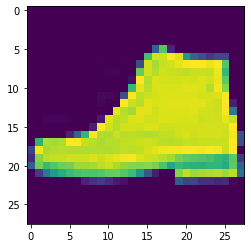

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

In [ ]:
#nomalize the data(0,1)
training_images=training_images/255.0
test_images=test_images/255.0

Model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy')
model.fit(training_images,training_labels,epochs=15,callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1190

Reached 60% accuracy so cancelling training!


O*nce it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.3165. This tells you that your neural network is about 71 approx% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.*

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding! * **bold text****italicized text***

Trying on Test data

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3574


0.3573588728904724

**Improving the Model-1 **

In [ ]:
classification=model.predict(test_images)
print(classification[0])

[1.42607732e-05 3.98261392e-07 1.30837816e-06 4.30235314e-09
 1.28495685e-07 1.92350745e-02 1.36909489e-06 3.13897520e-01
 1.03079925e-04 6.66746855e-01]


In [ ]:
print(test_labels[0])

9


In [ ]:
#increasing the neurons and lets check whats the result after that
model1=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model1.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy')
model1.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4775
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3595
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3237
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2995
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2807


In [ ]:
model1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3373


0.33728617429733276

In [ ]:
#increasing the no of epochs
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy')
model.fit(training_images,training_labels,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4765
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3606
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3234
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2991
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2791
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2648
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2514
Epoch 8/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2398
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2298
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2216
Epoch 11/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2121
Epoch 12/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2060
E

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4180


0.41798603534698486